<p style="text-align: left;">
 <font size="6"> 
    Exploring 
    <font color="red"> 
        COVID-19
    </font> 
    data with 
    <font color="blue"> 
    Jupyter
    </font>
    <font color="orange"> 
    Notebook <br>
    </font>
 </font>
 <font size="4"> 
    Framingham State University, A Day in May (May 19, 2020) <br>
    <br>
 </font>
 <font size="3">
    prepared by: <br> 
 </font>
 <font size="4">
    Professor Larry McKenna and Guy Evans, PhD  
    Department of Physics and Earth Science  
 </font>
</p>

# 0. Introduction
With the worldwide outbreak of **[COVID-19](https://www.cdc.gov/coronavirus/2019-ncov/index.html)** and the shuttering of physical campuses, institutions of higher education in the United States (and elsewhere) are confronted with the challenge of providing high-quality educational experiences in a remote online learning environment. These same institutions are simultaneously faced with significant budgetary and enrollment uncertainty as student behavior and choices, as well as their willingness and ability to pay for higher education services, are expected to be strongly affected by this ongoing public health and economic emergency.  

In this context, we would like to highlight the availability, accessability, and utility of **[Jupyter Notebook](https://jupyter.org/)**, a professional-quality computational notebook that can be leveraged as an **[open educational resource](https://www.mass.edu/strategic/oer.asp)** for higher education. Jupyter Notebook is a budget neutral solution that will allow you to provide your students with training in the widely used and marketable [Python](https://www.python.org/doc/) computing language and inspire them to critically engage with quantitative and digitally available data resources. 

While many different setups are technically available, we recommend downloading Jupyter Notebook as part of the **[Anaconda Distribution](https://www.anaconda.com/products/individual)**. This downloadable package contains a number of items that will allow for a essentially plug-and-play experience. Jupyter Notebooks saved in a [Github](https://github.com/) repository are remotely accessible through the online [Binder](https://mybinder.org/) remote access portal. This means that you (and your students) can still make use of interactive data explorations created using Jupyter Notebook even if actually downloading these resources and actively creating these notebooks is beyond the desired parameters of your course.

# 1. Software Libraries 
A powerful aspect of the Python computing language is the availability of extendable "libraries" that contain code specialized for various purposes. Many useful libraries are downloaded as part of the Anaconda Distribution. Other, more specialized libraries can be downloaded using the [conda installer](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) accessed through the Terminal application (for MacOS or Linux) or the Anaconda Prompt (for Windows). When using Binder, you can specify the required libraries using a document called requirements.txt saved in your Github folder.  

For now, we will just focus on importing a basic library downloaded as part of the Anaconda Distribution. This library, called "Pandas" contains code useful for manipulating "data frames", essentially data tables. In the following code block, we will import the Python library [Pandas](https://pandas.pydata.org/) and give it the alias "pd". This means that the next time we want to access the Pandas library, we will just type in the alias "pd". 

In [1]:
import pandas as pd # imports the Python library called "Pandas"

We will also import the libraries:  
* [numpy](https://numpy.org/) a basic package for scientific computing
* [scipy](https://www.scipy.org/) a more advanced package for scientific computing
* [matplotlib](https://matplotlib.org/) for plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as opt
from scipy.stats.distributions import  t

# 2. Data Sources
In the following data exploration, we will be using data from the wiki compilation  https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Massachusetts which gives confirmed cases of COVID-19 in Masachusetts. Ultimately, these data are based on daily updates from the MA Dept of Public Health, such as https://www.mass.gov/doc/covid-19-cases-in-massachusetts-as-of-march-28-2020/download.  

These data are stored in the .csv (comma-separated variable) file, "**Cov_Ma.csv**". This data table was produced by copying the table "Coronavirus disease 2019 (COVID-19) cases in Massachusetts" published on the above Wikipedia website into Excel and saving this table as a .csv file. 

You can **generate a .csv file in Excel** by going to "Save As" and saving in the .csv format. Once you have a .csv file, you can distribute this file to students through blackboard or include this in the Github repository. Depending on their individual set-ups, some students' computers may open the .csv file in an online web interface. If this happens, you can also e-mail students the file. Supplying the file as part of a Github repository would avoid this problem.  

We recommend this method as the simplest and most accessible method for beginning faculty and students. More sophisticated methods of obtaining data are possible and would allow you to automatically download up-to-date data from an online source (see the library [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) for html parsing). 

# 3. Subsidiary factoids
To warm up and give some context to our data, let's estimating the populations of Boston and Massachusetts. These estimates will be based on linear extrapolation of recent census data to the current year.

### Population  of Boston:

In [3]:
pop_yr = [2010,2017] #Two recent years in which the population of Boston was counted.
pop_pp = [620702,685094] #Population estimates for those two years.

# We will now estimate the current population of Boston by extrapolation  of a line
# connecting the two most recent years in which population was counted.

delta_yr = pop_yr[1]-pop_yr[0] #calculate difference in years (2017-2010)
delta_pp = pop_pp[1]-pop_pp[0] #calculate difference in population (2017-2010)
slope_in_pop_2010_2017_bos = delta_pp/delta_yr #calculate population slope (delta y / delta x)
current_year = 2020
years_since_last_estimate = current_year - pop_yr[1]
pop_2020_bos = years_since_last_estimate*slope_in_pop_2010_2017_bos+pop_pp[1]

#We will now print the result in a nice, easy-to-read format.
print ("The estimated poplulation of Boston in "
       +str(current_year)+
       " based on a linear extrapolation of the last two population estimates ("
       + str(pop_yr[0])
       + " and "
       + str(pop_yr[1])
       + ") is "
       + str(round(pop_2020_bos)) + " people.")

The estimated poplulation of Boston in 2020 based on a linear extrapolation of the last two population estimates (2010 and 2017) is 712691 people.


### Population of Massachusetts:

In [4]:
pop_yr = [2005,2018] #Two recent years in which the population of Massachusetts was counted.
pop_pp = [6.454e6,6.902e6] #Population estimates for those two years.

# We will now estimate the current population of Boston by extrapolation  of a line
# connecting the two most recent years in which population was counted.

delta_yr = pop_yr[1]-pop_yr[0] #calculate difference in years (2017-2010)
delta_pp = pop_pp[1]-pop_pp[0] #calculate difference in population (2017-2010)
slope_in_pop_2010_2017_ma = delta_pp/delta_yr #calculate population slope (delta y / delta x)
current_year = 2020
years_since_last_estimate = current_year - pop_yr[1]
pop_2020_ma = years_since_last_estimate*slope_in_pop_2010_2017_bos+pop_pp[1]

#We will now print the result in a nice, easy-to-read format.
print ("The estimated poplulation of Massachusetts in "
       +str(current_year)+
       " based on a linear extrapolation of the last two population estimates ("
       + str(pop_yr[0])
       + " and "
       + str(pop_yr[1])
       + ") is "
       + str(round(pop_2020_ma)) + " people.")

The estimated poplulation of Massachusetts in 2020 based on a linear extrapolation of the last two population estimates (2005 and 2018) is 6920398 people.


In [5]:
# We will now calculate the population of Boston as a percentage of the population of Massachustts
perc_pop_ma_in_bos = pop_2020_bos/pop_2020_ma*100

#We will now print the result in a nice, easy-to-read format.
print('Roughly '
      + str(round(perc_pop_ma_in_bos,1))
      + '% of the Massachusetts population live in Boston,'
      + ' or roughly '
      + str(round(pop_2020_bos/1e3))
      + ' thousand of ' 
      + str(round(pop_2020_ma/1e6,2))
      + ' million people.') 

Roughly 10.3% of the Massachusetts population live in Boston, or roughly 713 thousand of 6.92 million people.


# 4. Let's Start Exploring!
To start our data exploration, we first want to import the data.

In [6]:
#Run this code block to:
#1. Identify the file location (folder is implied).
Cov_Ma_fileloc  = 'Cov_Ma.csv'
#2. Import the data from a .csv file to a Pandas dataframe.
Cov_Ma = pd.read_csv(Cov_Ma_fileloc)

Now that we think we've imported the data, we want to check by viewing a selection of the data.

In [7]:
Cov_Ma.head()

,Date,Total_Confirmed,Total_Change,Total_%_change,Total_Presumptive,Total_CDC confirmed,Exposure_Biogen,Exposure_Local,Exposure_Travel,Exposure_Unknown,...,Tests_%_change,Hospitalization_Yes,Hospitalization_no,Hospitalization_unknown,Deaths_Total,Deaths_Change,Deaths_%_change,Quarantine_Total,Quarantine_Released,Source
0,1-Feb,1,0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[7]
1,2-Mar,2,1,100%,1.0,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608.0,377.0,[12]
2,5-Mar,3,1,50%,2.0,1.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[105][note 19]
3,6-Mar,8,5,166%,7.0,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[note 19]
4,7-Mar,13,5,62%,12.0,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[note 20]


We also want to check the types of data stored.

In [8]:
Cov_Ma.dtypes

Date                        object
Total_Confirmed              int64
Total_Change                 int64
Total_%_change              object
Total_Presumptive          float64
Total_CDC confirmed        float64
Exposure_Biogen            float64
Exposure_Local             float64
Exposure_Travel            float64
Exposure_Unknown           float64
Tests_Total                float64
Tests_Change               float64
Tests_%_change              object
Hospitalization_Yes        float64
Hospitalization_no         float64
Hospitalization_unknown    float64
Deaths_Total               float64
Deaths_Change              float64
Deaths_%_change             object
Quarantine_Total           float64
Quarantine_Released        float64
Source                      object
dtype: object

On inspection, we notice that this data set **doesn't specify the year**. We also notice that the data type used for the 'Date' column is 'object', namely a string literal. To plot the data, we will need to:
1. specify the year 
2. convert the data type to a datetime. 

We will do this by adding a new column called 'YearDate' so that we don't alter the original 'Date' column.

In [9]:
#Generate entries for new 'YearDate' column by appending '2020' to entries in 'Date' column.
Cov_Ma['YearDate'] = '2020-'+ Cov_Ma['Date']
#Convert data type of 'YearDate' column to datetime.
Cov_Ma['YearDate']= pd.to_datetime(Cov_Ma['YearDate'],format='%Y-%d-%b')
#Move 'YearDate' column to front.
col = Cov_Ma.pop('YearDate')
Cov_Ma.insert(0, col.name, col)
#Display first five rows.
Cov_Ma.head()

,YearDate,Date,Total_Confirmed,Total_Change,Total_%_change,Total_Presumptive,Total_CDC confirmed,Exposure_Biogen,Exposure_Local,Exposure_Travel,...,Tests_%_change,Hospitalization_Yes,Hospitalization_no,Hospitalization_unknown,Deaths_Total,Deaths_Change,Deaths_%_change,Quarantine_Total,Quarantine_Released,Source
0,2020-02-01,1-Feb,1,0,NaN,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[7]
1,2020-03-02,2-Mar,2,1,100%,1.0,1.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608.0,377.0,[12]
2,2020-03-05,5-Mar,3,1,50%,2.0,1.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[105][note 19]
3,2020-03-06,6-Mar,8,5,166%,7.0,1.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[note 19]
4,2020-03-07,7-Mar,13,5,62%,12.0,1.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,470.0,[note 20]


In [10]:
# Confirm that datatype of 'YearDate' column is datetime.
Cov_Ma.dtypes.head()

YearDate           datetime64[ns]
Date                       object
Total_Confirmed             int64
Total_Change                int64
Total_%_change             object
dtype: object

Now that we've confirmed that we can access the data and have put the dates in the proper format, we can plot the data.

## 4.1. Plotting  the Data
### Total Cases and Deaths
We can now plot total cummulative cases and deaths.

Text(0,0.5,'Totals')

<Figure size 432x288 with 0 Axes>

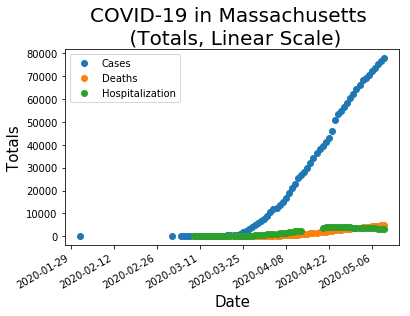

In [41]:
fig = plt.figure()
Cov_Ma.plot(x='YearDate', y=['Total_Confirmed','Deaths_Total','Hospitalization_Yes'],style='o', label = ['Cases', 'Deaths', 'Hospitalization'])
plt.title('COVID-19 in Massachusetts \n (Totals, Linear Scale)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Totals', size = 15)

We can plot this data on a semi-log plot to identify changes in the rate of increase.

Text(0,0.5,'Totals \n (log)')

<Figure size 432x288 with 0 Axes>

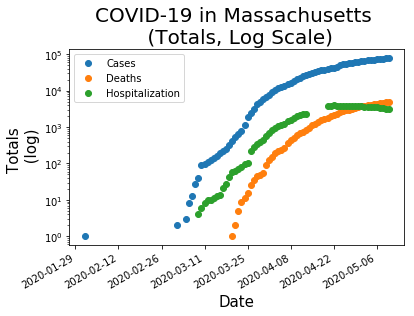

In [44]:
fig = plt.figure()
Cov_Ma.plot(x='YearDate', y=['Total_Confirmed','Deaths_Total','Hospitalization_Yes'],style='o', label = ['Cases', 'Deaths', 'Hospitalization'], logy = True)
plt.title('COVID-19 in Massachusetts \n (Totals, Log Scale)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Totals \n (log)', size = 15)

### Cases and Deaths per day
We can also plot the number of cases and deaths per day. We will do this on a linear andd then semi-log plot.

Text(0,0.5,'New Cases/ \n Deaths per Day')

<Figure size 432x288 with 0 Axes>

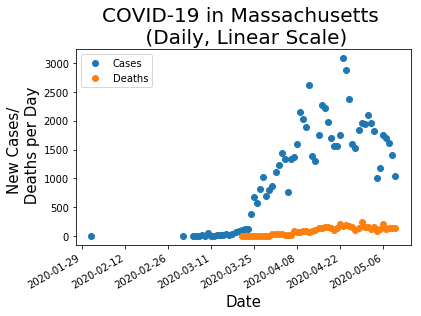

In [42]:
fig = plt.figure()
Cov_Ma.plot(x='YearDate', y=['Total_Change','Deaths_Change'],style='o', label = ['Cases', 'Deaths'])
plt.title('COVID-19 in Massachusetts \n (Daily, Linear Scale)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('New Cases/ \n Deaths per Day', size = 15)

Text(0,0.5,'New Cases/Deaths \n per Day')

<Figure size 432x288 with 0 Axes>

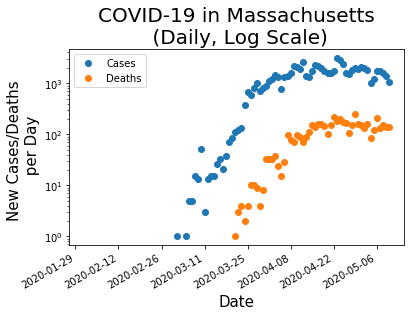

In [43]:
fig = plt.figure()
Cov_Ma.plot(x='YearDate', y=['Total_Change','Deaths_Change'],style='o', logy = True, label = ['Cases', 'Deaths'])
plt.title('COVID-19 in Massachusetts\n (Daily, Log Scale)', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('New Cases/Deaths \n per Day', size = 15)

## 4.2. Fitting the Data to a Logistic Curve
The logistic curve is given by:  
$$ m_i = \frac{k_i}{1+e^{-(t-t_0)\cdot\gamma}}$$ 

where $m_i$ is the total number of cases (or deaths), $k_i$ is the maximum number of total cases (or deaths), $t$ is the number of days since the start (we will use March 10th), and $\gamma$ is a constant related to the growth rate.  

To keep things cleaner, we will create a new data frame containing only the data we need to fit this model. 

In [15]:
#Defining the Start Day.
start_day_as_str = '2020-03-10'
start_day_as_dt = pd.to_datetime(start_day_as_str)
day_col_label = 'Days since ' + start_day_as_str

In [16]:
# Creating the data frame.
Cov_Ma_select = pd.DataFrame(columns = [day_col_label,
                                        'YearDate',
                                        'Total Confirmed Cases',
                                        'Total Confirmed Deaths',])
#Populating the dataframe.
#Calculate Days since March 10, 2020.
Cov_Ma_select[day_col_label] = Cov_Ma['YearDate'] - start_day_as_dt
Cov_Ma_select[day_col_label] = Cov_Ma_select[day_col_label].dt.days

#Fill other columns by copying.
Cov_Ma_select['YearDate'] = Cov_Ma['YearDate']
Cov_Ma_select['Total Confirmed Cases'] = Cov_Ma['Total_Confirmed']
Cov_Ma_select['Total Confirmed Deaths'] = Cov_Ma['Deaths_Total']
Cov_Ma_select.head()

,Days since 2020-03-10,YearDate,Total Confirmed Cases,Total Confirmed Deaths
0,-38,2020-02-01,1,NaN
1,-8,2020-03-02,2,NaN
2,-5,2020-03-05,3,NaN
3,-4,2020-03-06,8,NaN
4,-3,2020-03-07,13,NaN


### Fitting the Data
Now that we have the data set up, we will try to fit this data to a logistical curve using the optimize.curve_fit function. Documentation on the optimize.curve_fit function can be found here:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html  

More help:
* Basic directions for fitting data to a non-linear function:  
https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

* Additional helpfor information:  
http://kitchingroup.cheme.cmu.edu/blog/2013/02/12/Nonlinear-curve-fitting-with-parameter-confidence-intervals/

* More information and examples:  
http://scipyscriptrepo.com/wp/?p=104

* for more advanced curve fitting and creation of confidence intervals, you can check out the library lmfit. (Unfortunately, this is not included in Anaconda)

As you begin to notice, there is a **robust user community** and lots of worked examples out there.

In [17]:
#Define a Logistic Function and parameter names for the table (data frame)
par_names = ['k','t_0','g']
def model_fun(t, k, t_0, g):
    return k / (1. + np.exp(-g *(t - t_0)))

x = Cov_Ma_select[day_col_label]
y = Cov_Ma_select['Total Confirmed Cases']

#Fit the data using the defined function
pars,pcov = opt.curve_fit(model_fun, x, y)
(k_, t_0_, g_,), _ = opt.curve_fit(model_fun, x, y)
y_fit = model_fun(x, pars[0],pars[1],pars[2])

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
n = len(y)    # number of data points
p = len(pars) # number of parameters
dof = max(0, n - p) # number of degrees of freedom
tval = t.ppf(1.0-alpha/2., dof) # student-t value for the dof and confidence level

In [18]:
Cov_model_cases = pd.DataFrame(columns = ['Parameter',
                                         'Estimate',
                                         'Variance',
                                         'Standard Error',
                                         'tStat'])
Cov_model_cases['Parameter'] = par_names
Cov_model_cases['Estimate'] = pars
Cov_model_cases['Variance'] = np.diag(pcov)
Cov_model_cases['Standard Error'] = np.diag(pcov)**0.5
Cov_model_cases['tStat'] = Cov_model_cases['Estimate'] / Cov_model_cases['Standard Error']
Cov_model_cases

,Parameter,Estimate,Variance,Standard Error,tStat
0,k,84709.579216,1.322554e+06,1150.023386,73.659006
1,t_0,41.675332,1.077900e-01,0.328314,126.937446
2,g,0.114259,5.636646e-06,0.002374,48.126101


(array([737453., 737467., 737481., 737495., 737509., 737523., 737537.,
        737551.]), <a list of 8 Text xticklabel objects>)

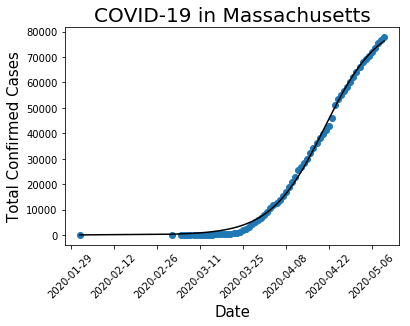

In [19]:
#plot the data and the proposed model
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(Cov_Ma_select['YearDate'], y, 'o')
ax.plot(Cov_Ma_select['YearDate'], y_fit, '-k')
plt.title('COVID-19 in Massachusetts', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Total Confirmed Cases', size = 15)
plt.xticks(rotation=45)

## Predictions

In [20]:
Pred_window=21
Pred_days=list(range(min(Cov_Ma_select[day_col_label]), max(Cov_Ma_select[day_col_label])+Pred_window+1))

In [21]:
from datetime import date, timedelta
Pred_dates = [start_day_as_dt + timedelta(days=x) for x in range(min(Pred_days)-1,max(Pred_days))]

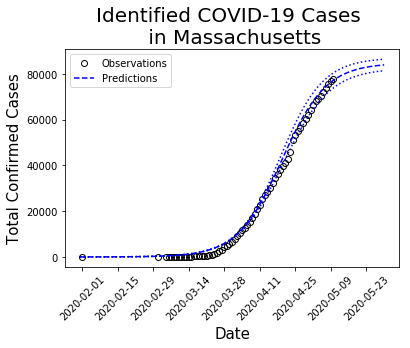

In [48]:
y_pred = model_fun(Pred_days, pars[0],pars[1],pars[2])
pars_2ste = 2*np.diag(pcov)**0.5
#Non-rigorous estimate of upper and lower windows
y_lower = model_fun(Pred_days, pars[0]-pars_2ste[0],pars[1]+pars_2ste[1],pars[2]-pars_2ste[2])
y_upper = model_fun(Pred_days, pars[0]+pars_2ste[0],pars[1]-pars_2ste[1],pars[2]+pars_2ste[2])

#plot the data and the proposed model
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(Cov_Ma_select['YearDate'], y, 'ko', markerfacecolor='none', label='Observations')
ax.plot(Pred_dates, y_pred, '--b', markerfacecolor='none', label='Predictions')
ax.plot(Pred_dates, y_upper, ':b', markerfacecolor='none')
ax.plot(Pred_dates, y_lower, ':b', markerfacecolor='none')
plt.title('Identified COVID-19 Cases \n in Massachusetts', size = 20)
plt.xlabel('Date', size = 15)
plt.ylabel('Total Confirmed Cases', size = 15)
plt.xticks(rotation=45)
plt.legend()